In [1]:
num = xlsread("卫健委统计数据.xlsx");

In [2]:
Cfd=num(:,1);%Confirmed
Spd=num(:,2);%Suspected
Crd=num(:,3);%Cured
Dth=num(:,4);%Death
ClC=num(:,5);%Close_Contacts
Rld=num(:,6);%Relieved
t = datetime('2020-01-10');
T=datenum(t):1:datenum(t)+length(num)-1;

In [3]:
[l,h]=size(num);
for i=1:h-1
    for j=2:l
    num(j,6+i)=num(j,i)-num(j-1,i);
    end
end
aCfd=num(:,7);%Added Confirmed
aSpd=num(:,8);%Added Suspected
aCrd=num(:,9);%Added Cured
aDth=num(:,10);%Added Death
aClC=num(:,11);%Added Close_Contacts

In [4]:
%Still being viewed
for j=2:10
    nClC(j)=num(j,5)-num(j,6);
end
for j=12:l
   nClC(j)=num(j,5)-sum(num(11:j,6)); 
end

In [30]:
TT=datenum(datetime('today'))-datenum(datetime('2020-01-22'));

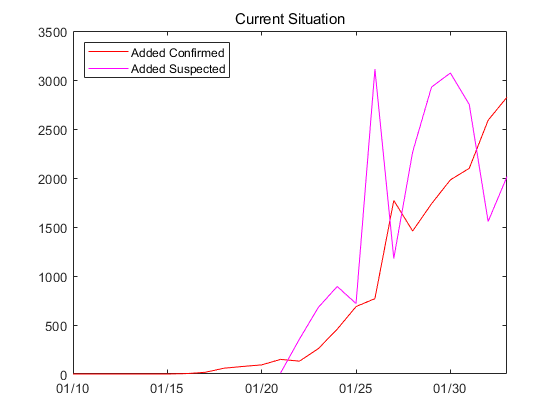

In [5]:
plot(T,aCfd,'r-',T,aSpd,'m-');
dateaxis('x');
legend("Added Confirmed","Added Suspected",'Location','northwest');
xlim([min(T),max(T)]);
title("Current Situation")

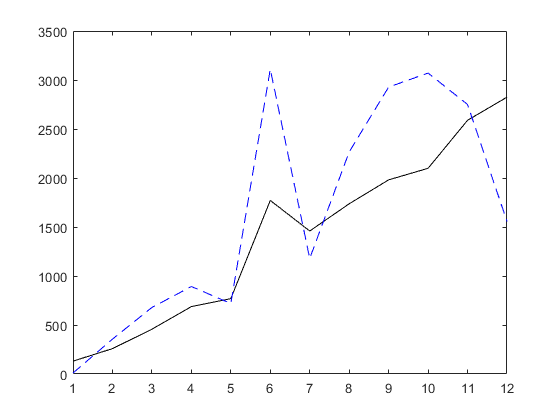

In [31]:
plot(1:TT,aCfd(end-TT+1:end),'k-',1:TT,aSpd(end-TT:end-1),'b--')
xlim([1,TT])


ans =

    1.0436


ans =

 -296.9242




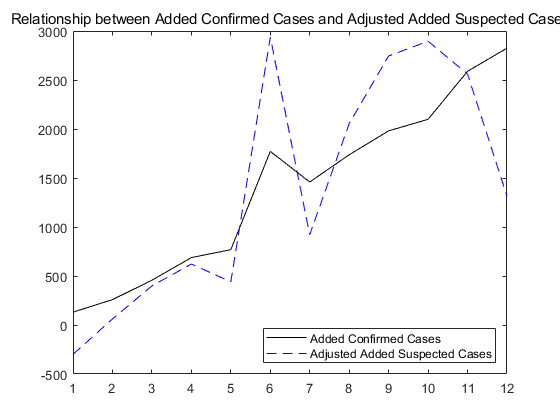

In [33]:
[kac]=polyfit(1:TT,aCfd(end-TT+1:end)',1);
[kas]=polyfit(1:TT,aSpd(end-TT:end-1)',1);
plot(1:TT,aCfd(end-TT+1:end),'k-',1:TT,(kac(1)/kas(1)).*(aSpd(end-TT:end-1)+kac(2)-kas(2)),'b--')
kac(1)/kas(1)
kac(2)-kas(2)
title("Relationship between Added Confirmed Cases and Adjusted Added Suspected Cases")
legend("Added Confirmed Cases","Adjusted Added Suspected Cases",'Location','southeast')
xlim([1,TT])


ans =

     0




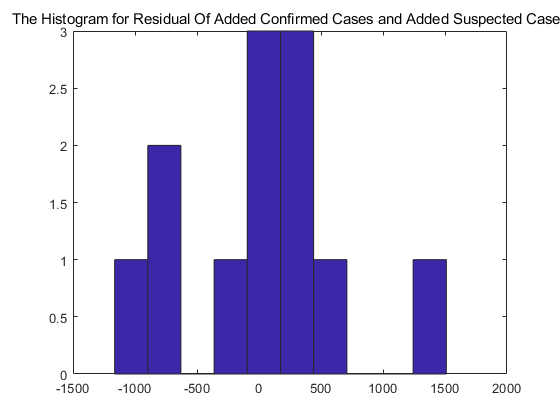

In [35]:
res=aCfd(end-TT+1:end)-(kac(1)/kas(1)).*(aSpd(end-TT:end-1)+kac(2)-kas(2));
chi2gof(res)
hist(res)
title("The Histogram for Residual Of Added Confirmed Cases and Added Suspected Cases")

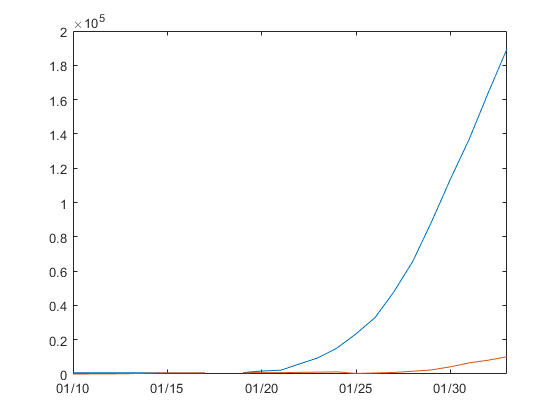

In [9]:
plot(T,ClC,T,Rld);
dateaxis();
xlim([min(T),max(T)]);

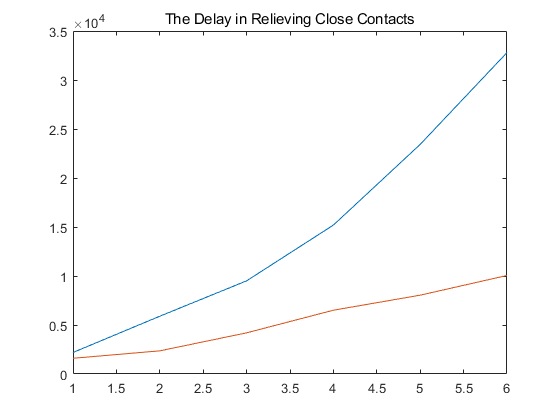

In [10]:
plot(1:6,ClC(end-12:end-7),1:6,Rld(end-5:end));
title("The Delay in Relieving Close Contacts")

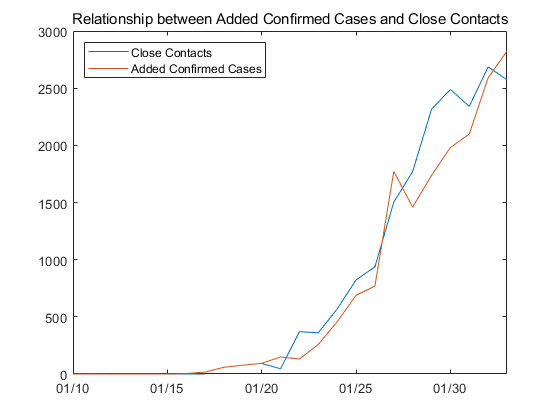

In [11]:
plot(T,0.1*aClC,T,aCfd);
dateaxis();
xlim([min(T),max(T)]);
title("Relationship between Added Confirmed Cases and Close Contacts")
legend("Close Contacts","Added Confirmed Cases",'Location','northwest')


ans =

    0.0300




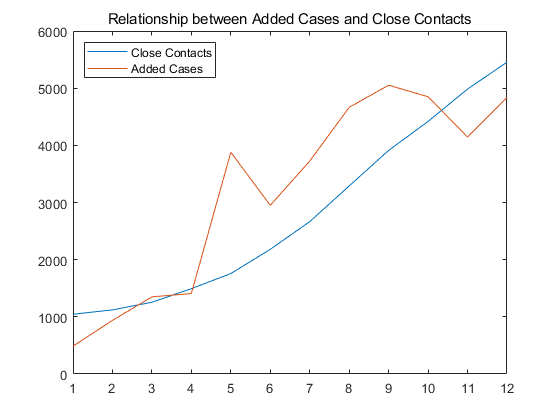

In [37]:
Aed=aSpd+aCfd;
[knc]=polyfit(1:TT,nClC(end-TT+1:end),1);
[kad]=polyfit(1:TT,Aed(end-TT+1:end)',1);
plot(1:TT,kad(1)/knc(1)*(nClC(end-TT+1:end)+kad(2)-knc(2)),1:TT,Aed(end-TT+1:end))
kad(1)/knc(1)
title("Relationship between Added Cases and Close Contacts")
legend("Close Contacts","Added Cases",'Location','northwest')
xlim([1,TT])


ans =

     0




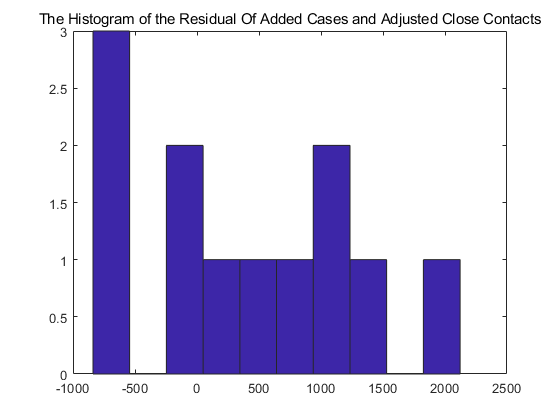

In [38]:
ares=Aed(end-TT+1:end)-kad(1)/knc(1)*(nClC(end-TT+1:end)'+kad(2)-knc(2));
chi2gof(ares)
hist(ares)
title("The Histogram of the Residual Of Added Cases and Adjusted Close Contacts")